# **House Prices - Advanced Regression Techniques**

O objetivo é prever os preços de venda e pratique engenharia de atributos, florestas aleatórias (RFs) e aumento de gradiente (gradient boosting).

## **Descrição da Competição**

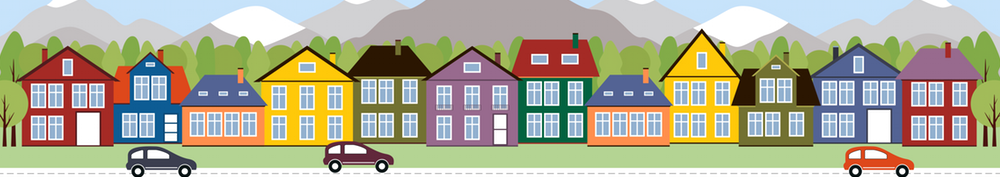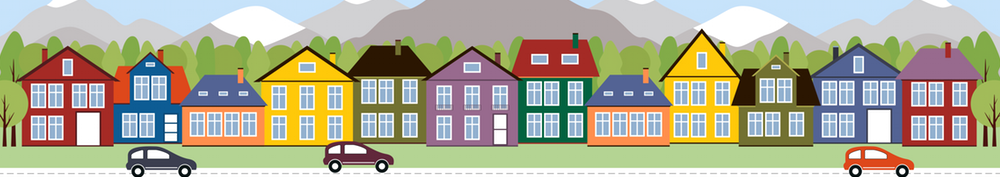

Peça a um comprador de imóveis para descrever sua casa dos sonhos, e provavelmente ele não começará pela altura do teto do porão ou pela proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição prática prova que muito mais influência as negociações de preço do que o número de quartos ou uma cerca branca.

Com 79 variáveis explicativas que descrevem (quase) todos os aspectos de casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

## **Habilidades práticas**

* Engenharia de recursos criativos
* Técnicas avançadas de regressão, como floresta aleatória e aumento de gradiente

## **Avaliação**

### **Objetivo**

Sua tarefa é prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice.

### **Métrica**

As submissões são avaliadas pelo Erro Quadrático Médio (RMSE) entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (Tomar logaritmos significa que erros na previsão de casas caras e baratas terão o mesmo impacto no resultado.)

### **Formato do Arquivo de Submissão**

O arquivo deve conter um cabeçalho e ter o seguinte formato:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```
## **Descrição dos Campos**

**SalePrice:** o preço de venda da propriedade em dólares. Esta é a variável alvo que você está tentando prever.\
**MSSubClass:** A classe do edifício.\
**MSZoning:** A classificação geral de zoneamento.\
**LotFrontage:** Metros lineares de rua conectados à propriedade.\
**LotArea:** Tamanho do lote em metros quadrados.\
**Street:** Tipo de acesso à rua.\
**Alley:** Tipo de acesso à viela.\
**LotShape:** Forma geral da propriedade.\
**LandContour:** Planicidade da propriedade.\
**Utilities:** Tipo de utilidades disponíveis.\
**LotConfig:** Configuração do lote.\
**LandSlope:** Inclinação da propriedade.\
**Neighborhood:** Localizações físicas dentro dos limites da cidade de Ames.\
**Condition1:** Proximidade de uma estrada principal ou ferrovia.\
**Condition2:** Proximidade de uma estrada principal ou ferrovia (se houver uma segunda).\
**BldgType:** Tipo de moradia.\
**HouseStyle:** Estilo de moradia.\
**OverallQual:** Qualidade geral do material e acabamento.\
**OverallCond:** Classificação geral da condição.\
**YearBuilt:** Data de construção original.\
**YearRemodAdd:** Data da reforma.\
**RoofStyle:** Tipo de telhado.\
**RoofMatl:** Material do telhado.\
**Exterior1st:** Revestimento exterior da casa.\
**Exterior2nd:** Revestimento exterior da casa (se houver mais de um material).\
**MasVnrType:** Tipo de revestimento de alvenaria.\
**MasVnrArea:** Área de revestimento de alvenaria em metros quadrados.\
**ExterQual:** Qualidade do material exterior.\
**ExterCond:** Condição atual do material exterior.\
**Foundation:** Tipo de fundação.\
**BsmtQual:** Altura do porão.\
**BsmtCond:** Condição geral do porão.\
**BsmtExposure:** Paredes do porão com acesso ao nível do jardim ou saída.\
**BsmtFinType1:** Qualidade da área acabada do porão.\
**BsmtFinSF1:** Metros quadrados da área acabada do tipo 1 no porão.\
**BsmtFinType2:** Qualidade da segunda área acabada (se houver).\
**BsmtFinSF2:** Metros quadrados da segunda área acabada no porão.\
**BsmtUnfSF:** Metros quadrados de área não acabada no porão.\
**TotalBsmtSF:** Total de metros quadrados do porão.\
**Heating:** Tipo de aquecimento.\
**HeatingQC:** Qualidade e condição do aquecimento.\
**CentralAir:** Ar condicionado central.\
**Electrical:** Sistema elétrico.\
**1stFlrSF:** Metros quadrados do primeiro andar.\
**2ndFlrSF:** Metros quadrados do segundo andar.\
**LowQualFinSF:** Metros quadrados acabados de baixa qualidade (todos os andares).\
**GrLivArea:** Metros quadrados da área habitável acima do solo.\
**BsmtFullBath:** Banheiros completos no porão.\
**BsmtHalfBath:** Banheiros de meio andar no porão.\
**FullBath:** Banheiros completos acima do solo.\
**HalfBath:** Banheiros de meio andar acima do solo.\
**Bedroom:** Número de quartos acima do nível do porão.\
**Kitchen:** Número de cozinhas.\
**KitchenQual:** Qualidade da cozinha.\
**TotRmsAbvGrd:** Total de cômodos acima do solo (não inclui banheiros).\
**Functional:** Classificação da funcionalidade da casa.\
**Fireplaces:** Número de lareiras.\
**FireplaceQu:** Qualidade da lareira.\
**GarageType:** Localização da garagem.\
**GarageYrBlt:** Ano em que a garagem foi construída.\
**GarageFinish:** Acabamento interior da garagem.\
**GarageCars:** Capacidade da garagem em número de carros.\
**GarageArea:** Tamanho da garagem em metros quadrados.\
**GarageQual:** Qualidade da garagem.\
**GarageCond:** Condição da garagem.\
**PavedDrive:** Entrada pavimentada.\
**WoodDeckSF:** Área do deque de madeira em metros quadrados.\
**OpenPorchSF:** Área da varanda aberta em metros quadrados.\
**EnclosedPorch:** Área da varanda fechada em metros quadrados.\
**3SsnPorch:** Área da varanda de três estações em metros quadrados.\
**ScreenPorch:** Área da varanda com tela em metros quadrados.\
**PoolArea:** Área da piscina em metros quadrados.\
**PoolQC:** Qualidade da piscina.\
**Fence:** Qualidade da cerca.\
**MiscFeature:** Característica adicional não coberta por outras categorias.\
**MiscVal:** Valor em dólares da característica adicional.
**MoSold:** Mês de venda.\
**YrSold:** Ano de venda.\
**SaleType:** Tipo de venda.\
**SaleCondition:** Condição da venda.




In [1]:
# importações da biblioteca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [3]:
# importando os dados

train_df = pd.read_csv('https://raw.githubusercontent.com/jherfson/pratica_House_Prices/refs/heads/main/dados/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/jherfson/pratica_House_Prices/refs/heads/main/dados/train.csv')


all_df = pd.concat((train_df.loc[:, :], test_df.loc[:, :]))
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Análise estatistico dos dados
all_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2920.000000,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.537785,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,...,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79428.893889
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2920.0,730.500000,421.537785,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,2920.0,56.897260,42.293325,20.0,20.00,50.0,70.00,190.0
LotFrontage,2402.0,70.049958,24.279694,21.0,59.00,69.0,80.00,313.0
LotArea,2920.0,10516.828082,9979.555080,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,2920.0,6.099315,1.382760,1.0,5.00,6.0,7.00,10.0
OverallCond,2920.0,5.575342,1.112609,1.0,5.00,5.0,6.00,9.0
YearBuilt,2920.0,1971.267808,30.197730,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,2920.0,1984.865753,20.641870,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,2904.0,103.685262,181.035018,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,2920.0,443.639726,456.019958,0.0,0.00,383.5,712.25,5644.0


In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [15]:
all_df.shape

(2920, 81)

/tmp/ipykernel_294864/526348484.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 4))


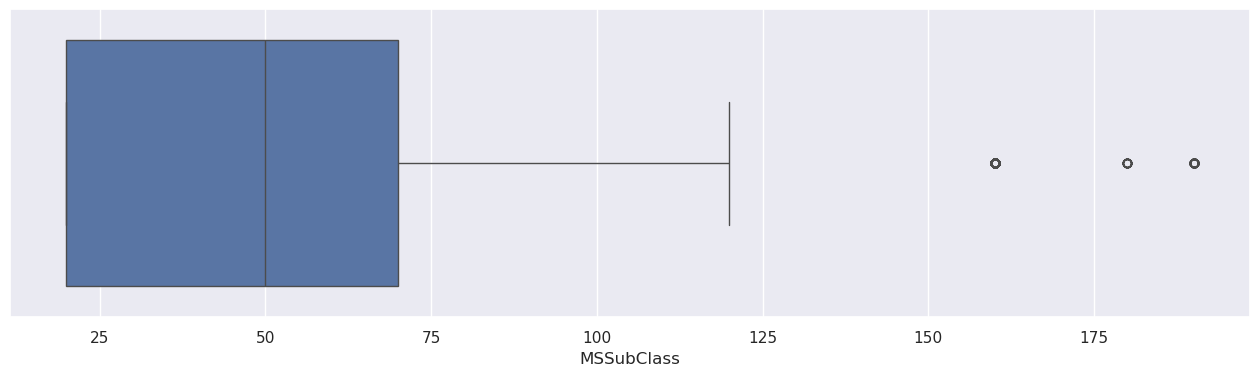

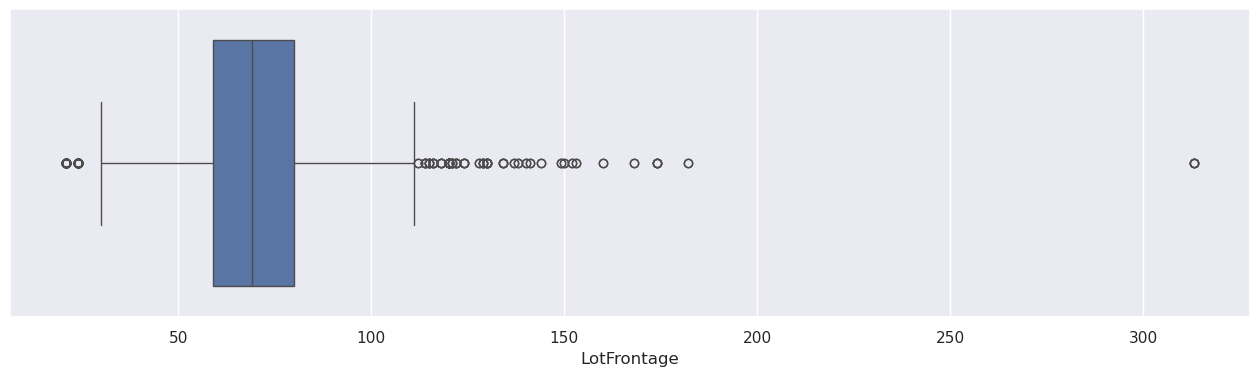

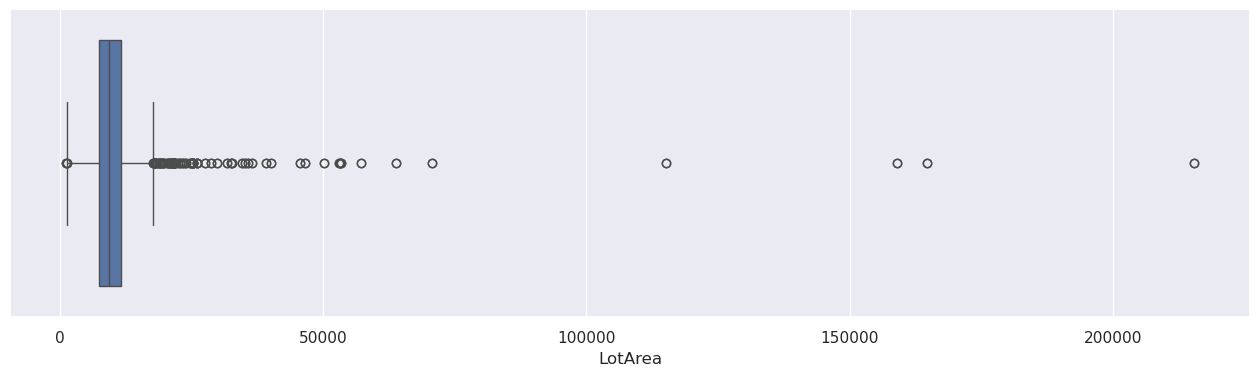

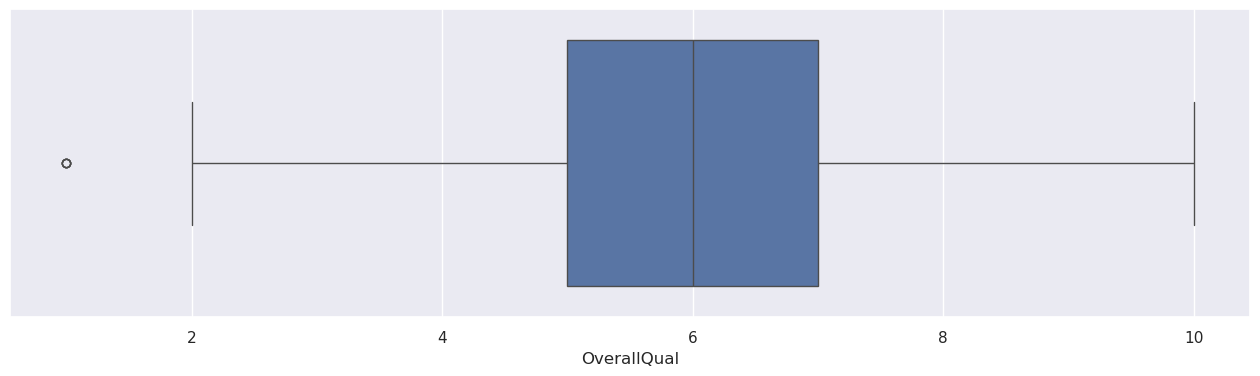

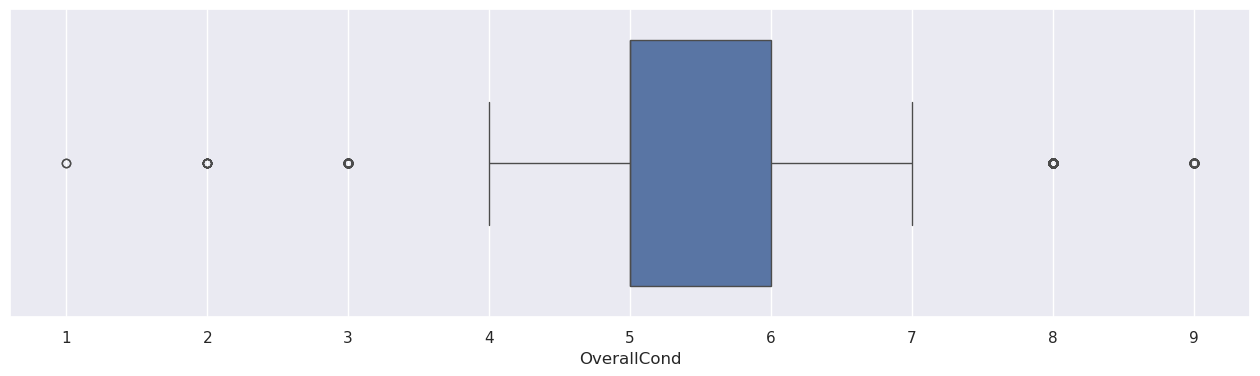

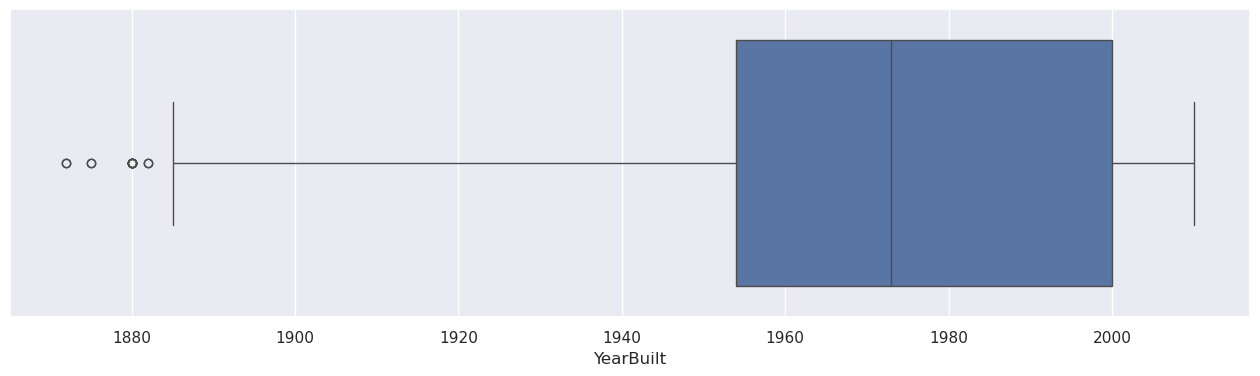

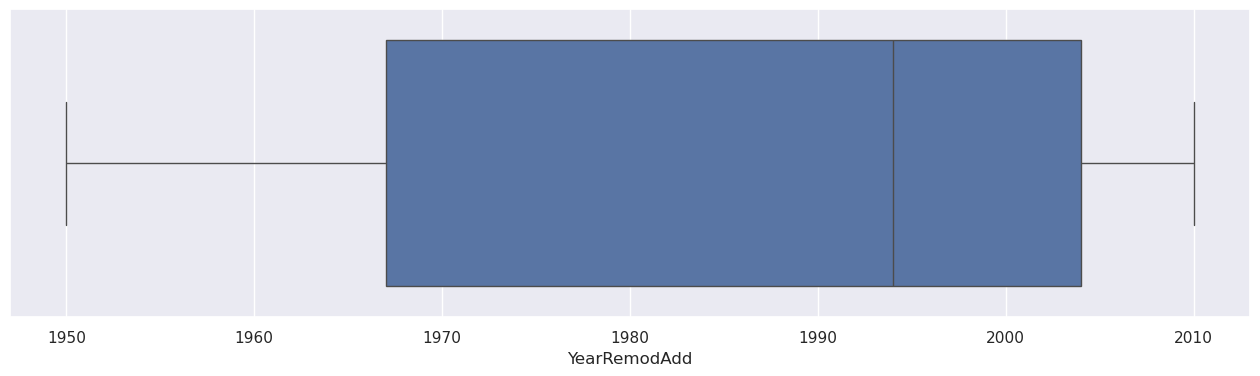

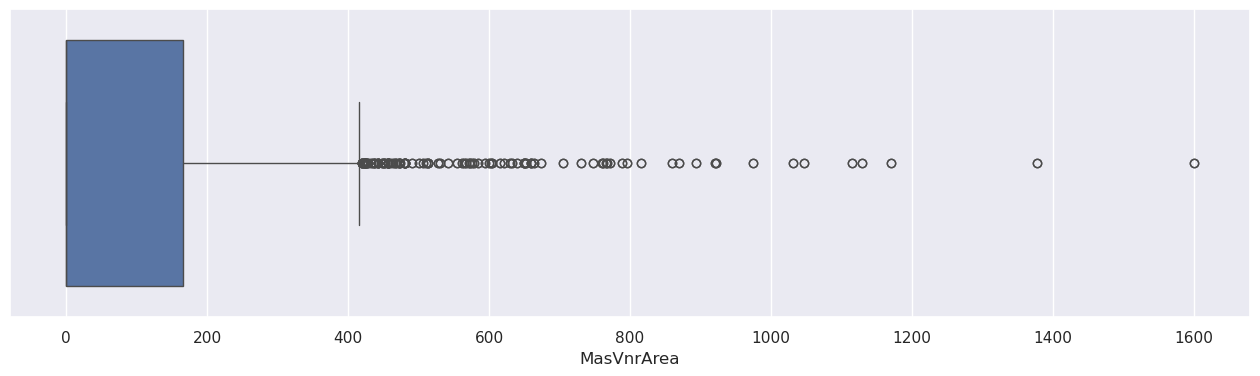

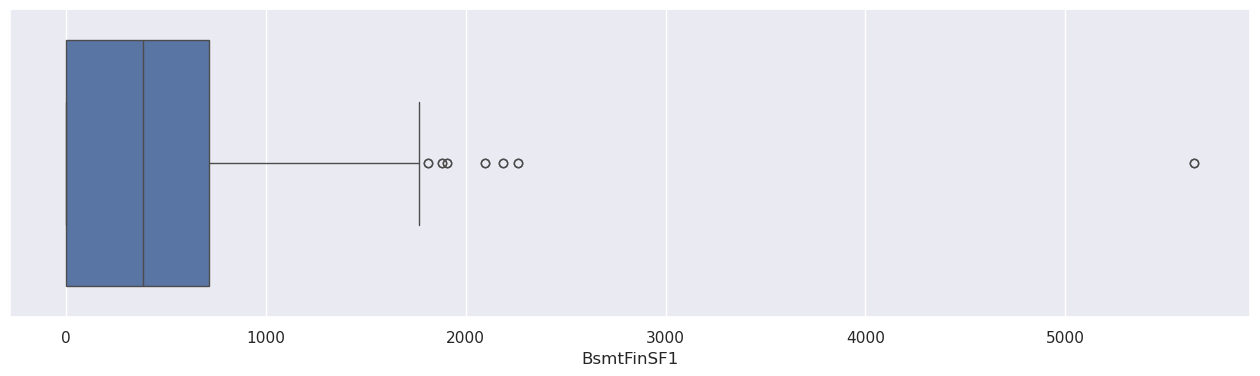

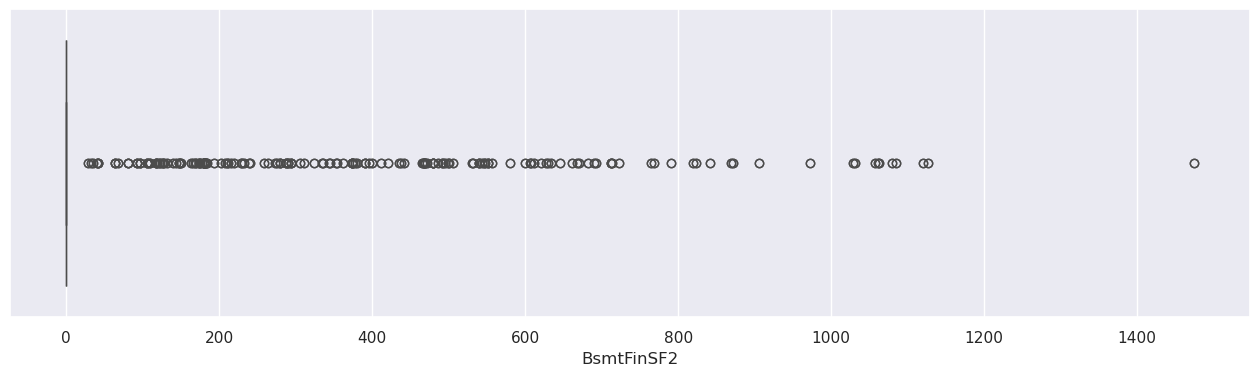

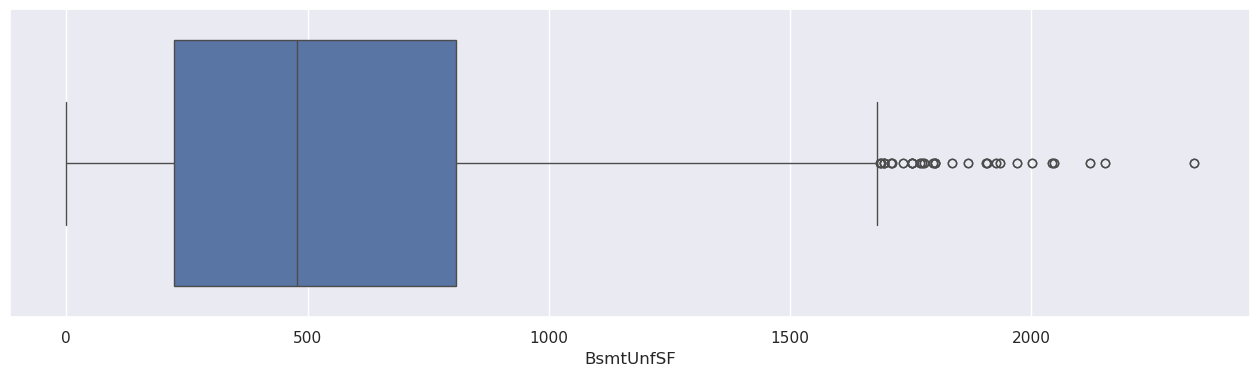

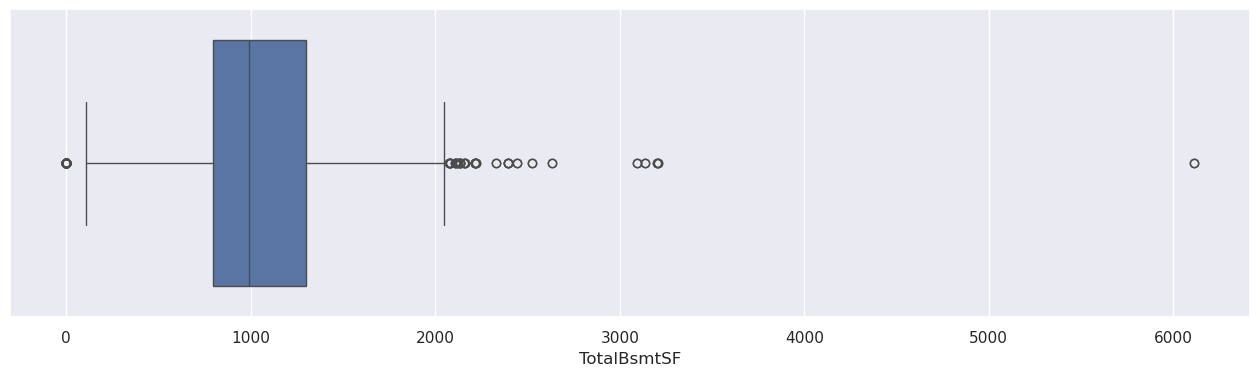

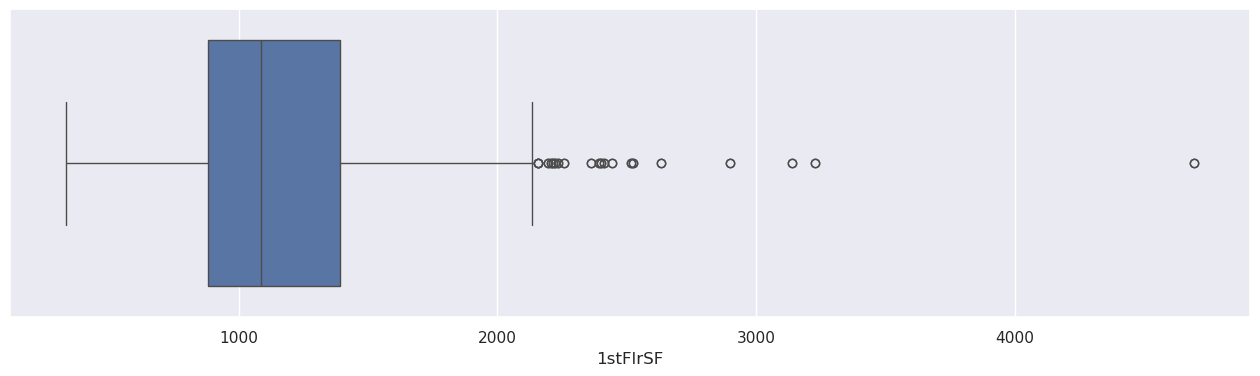

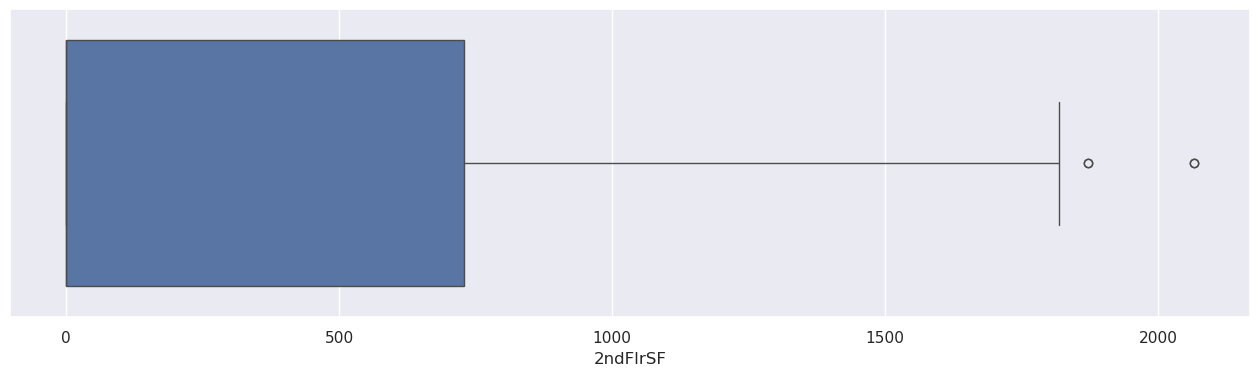

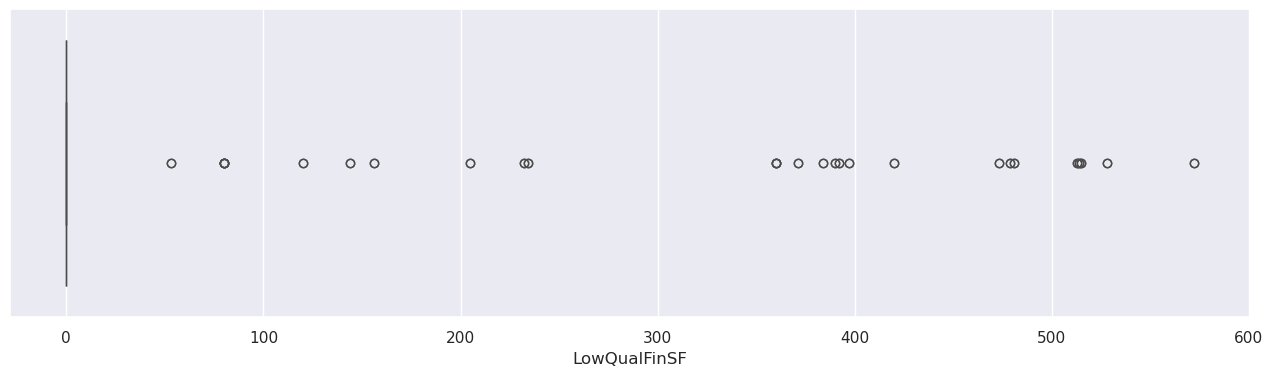

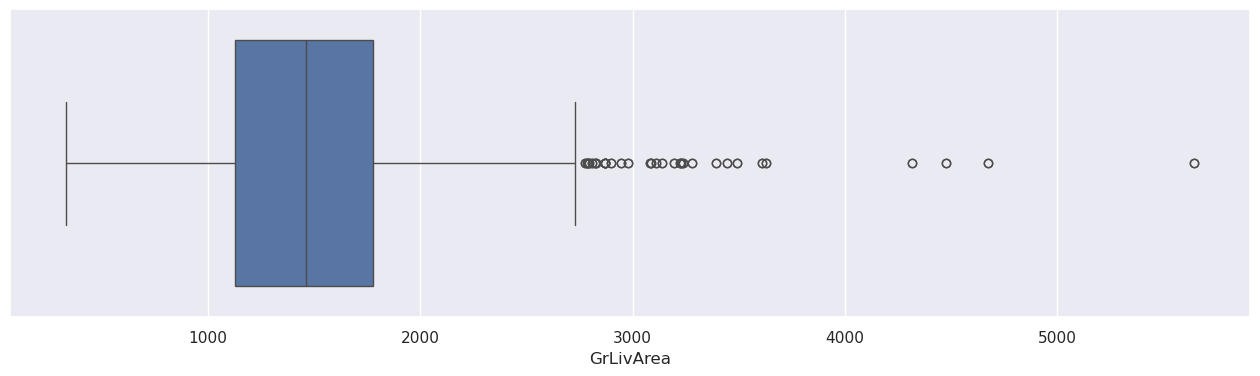

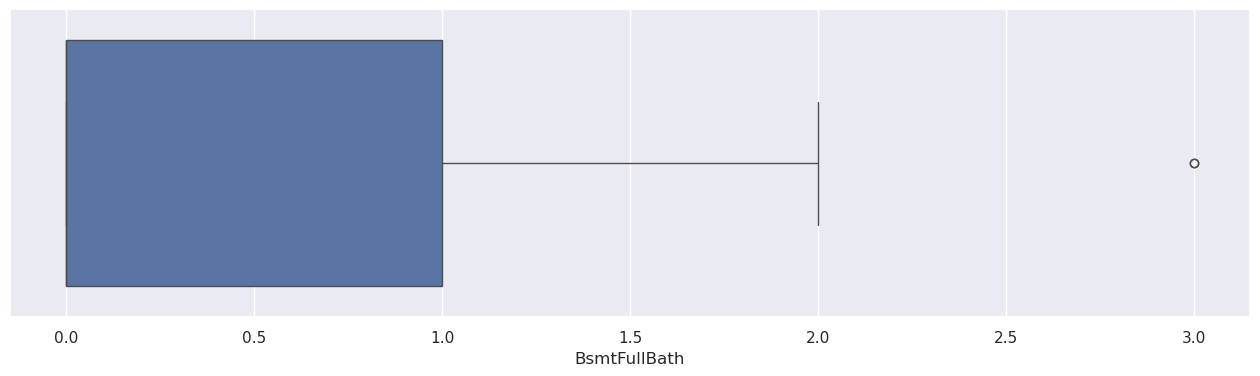

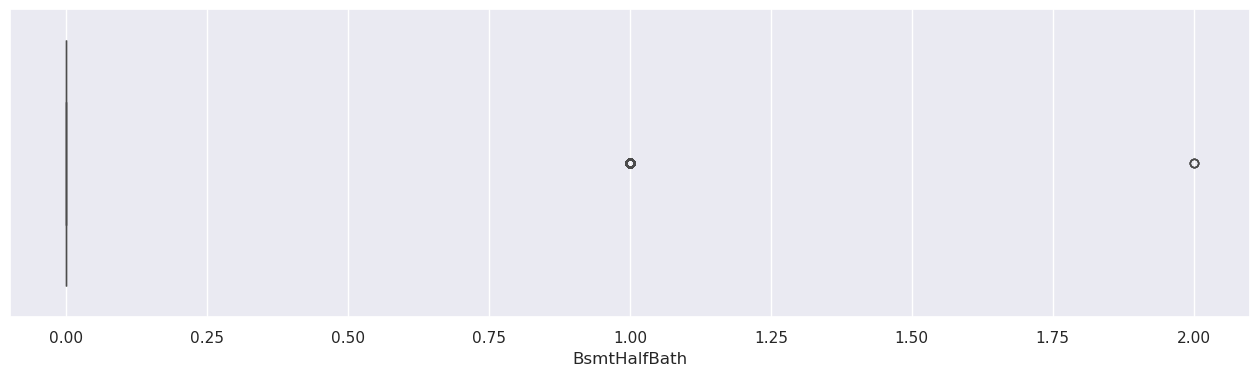

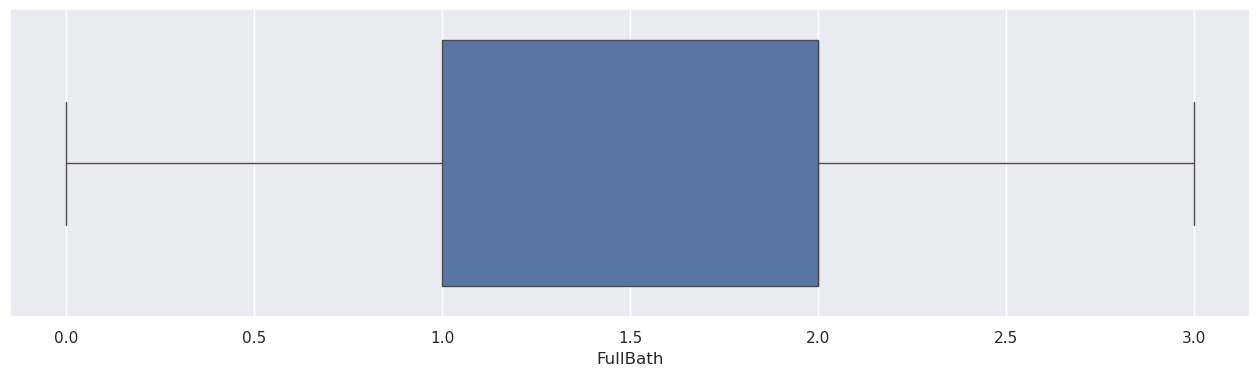

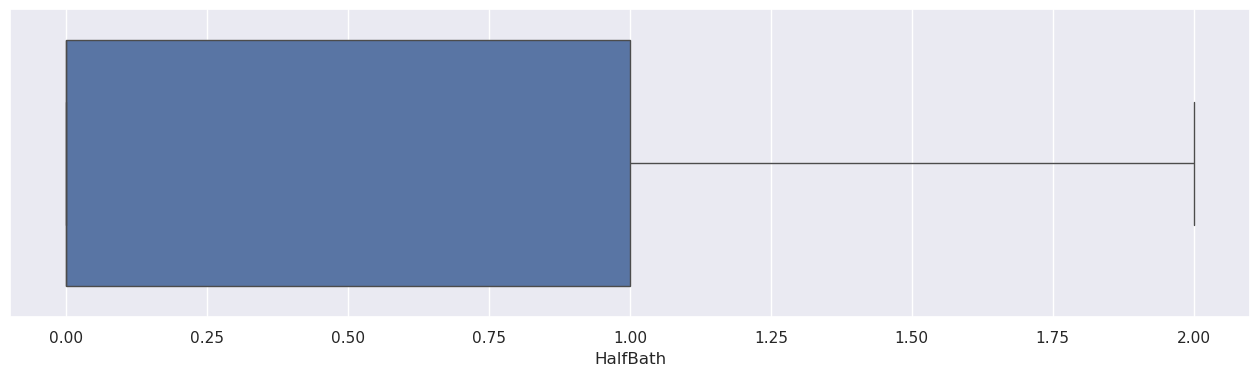

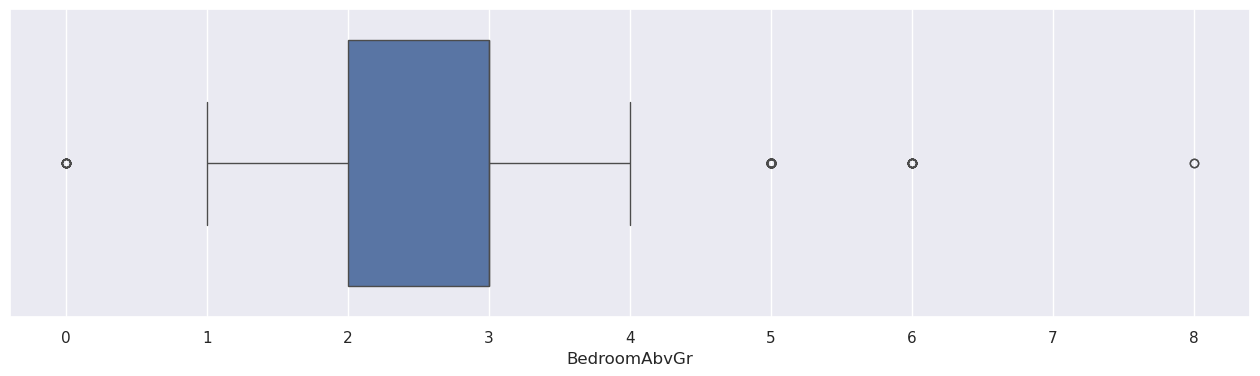

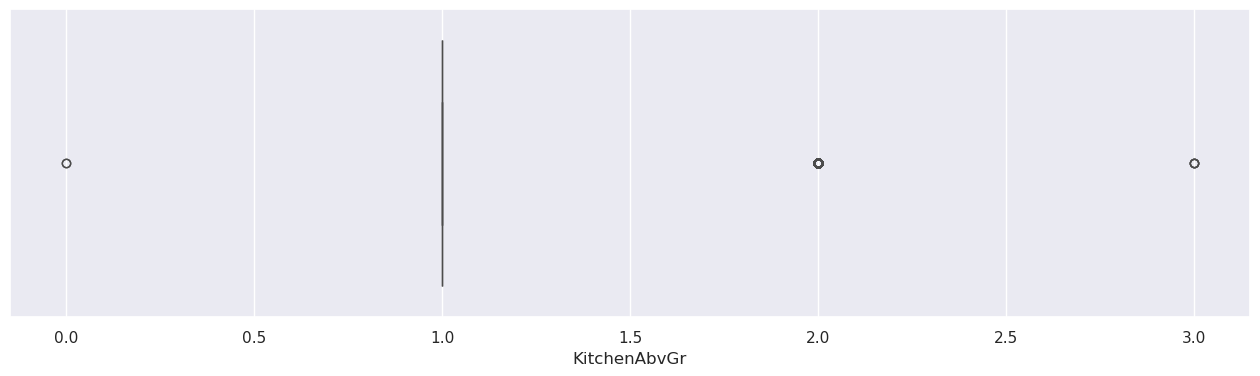

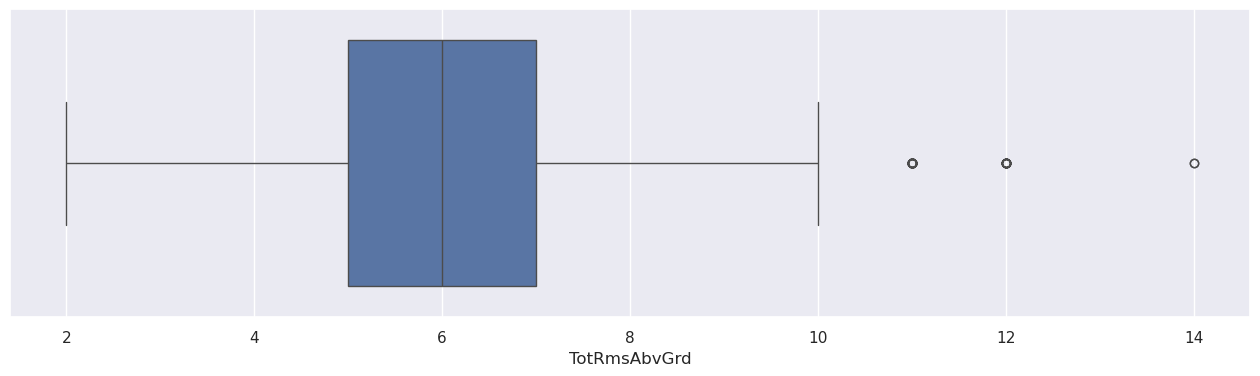

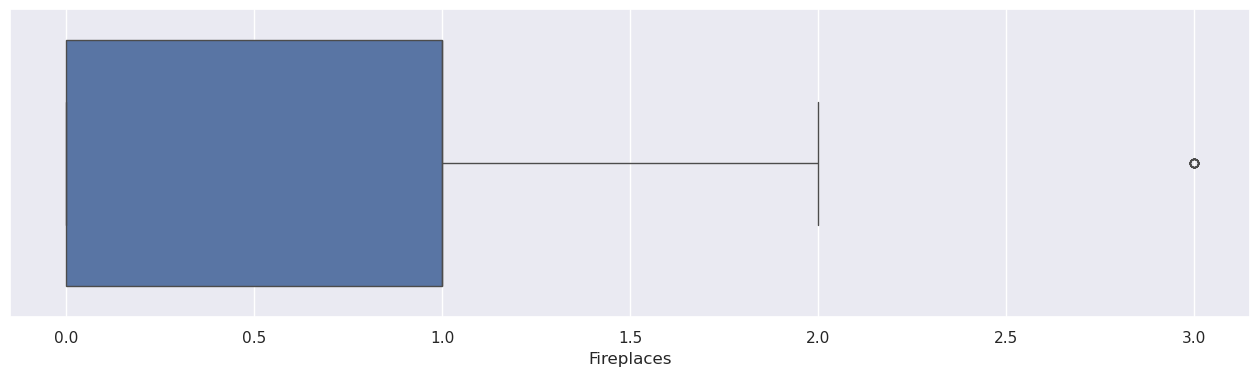

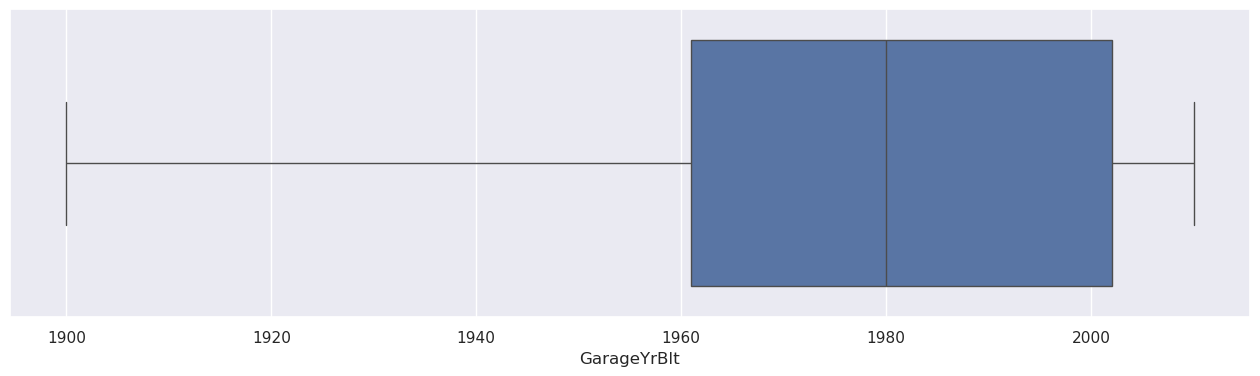

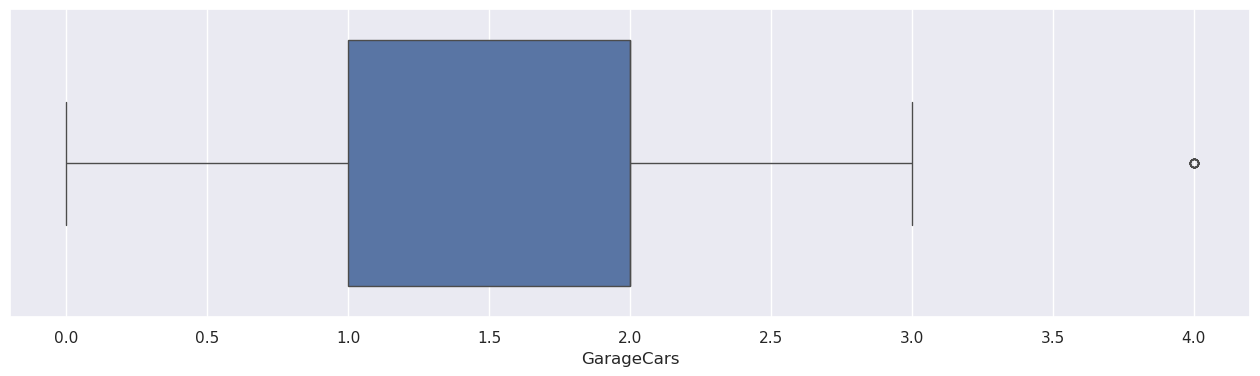

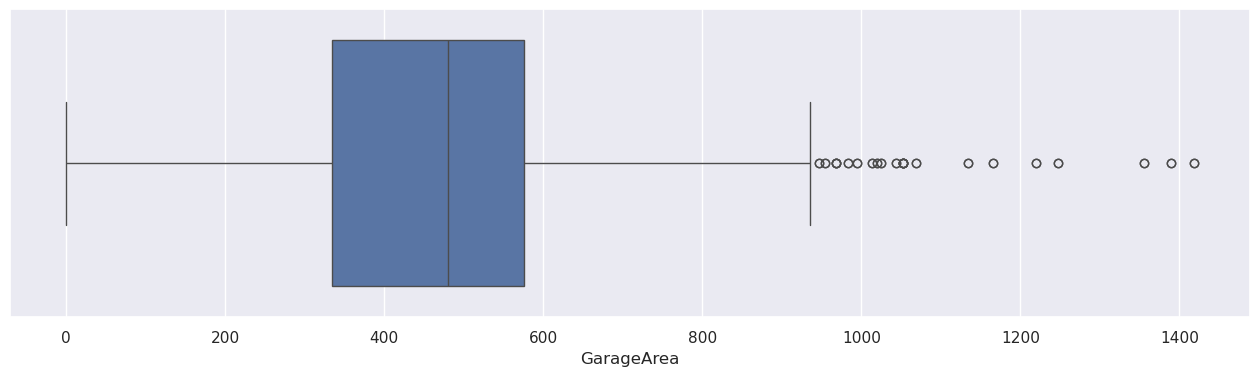

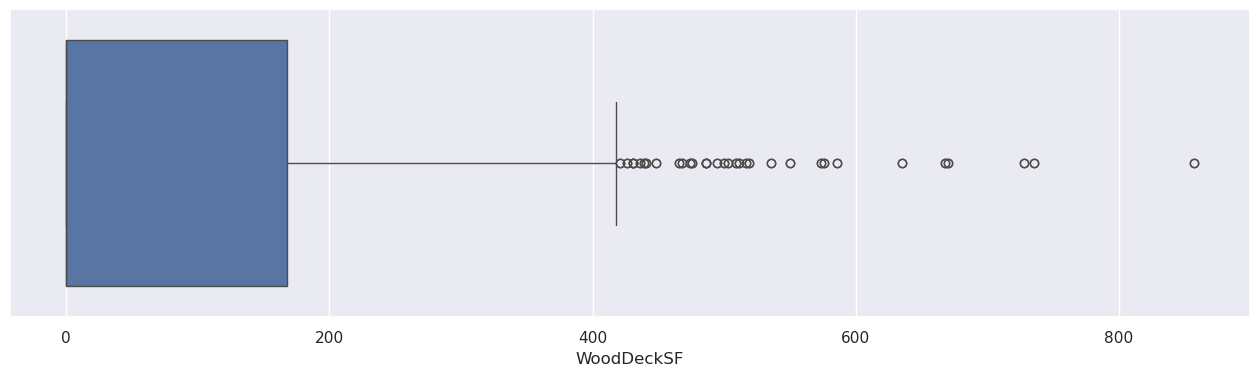

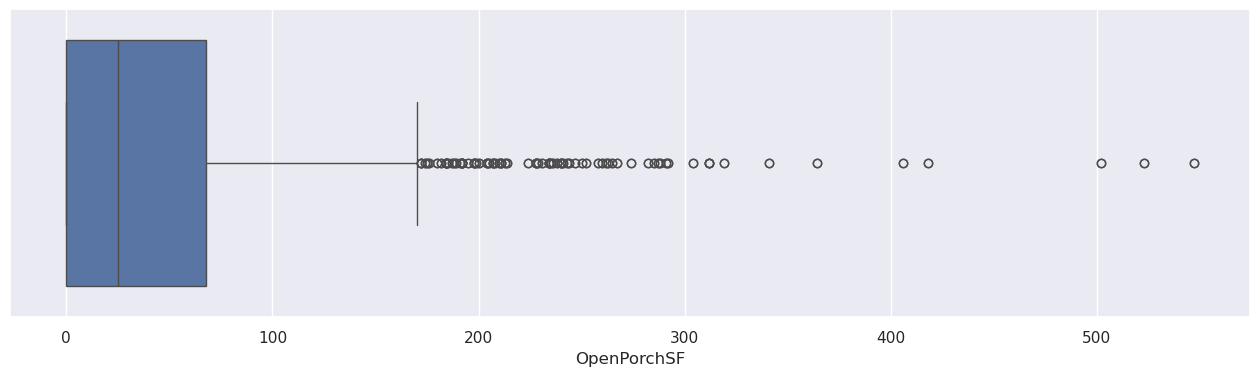

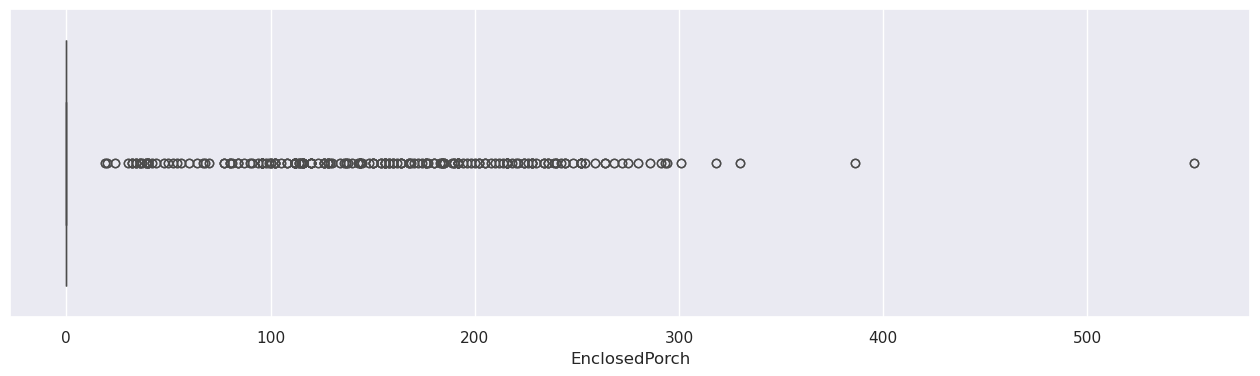

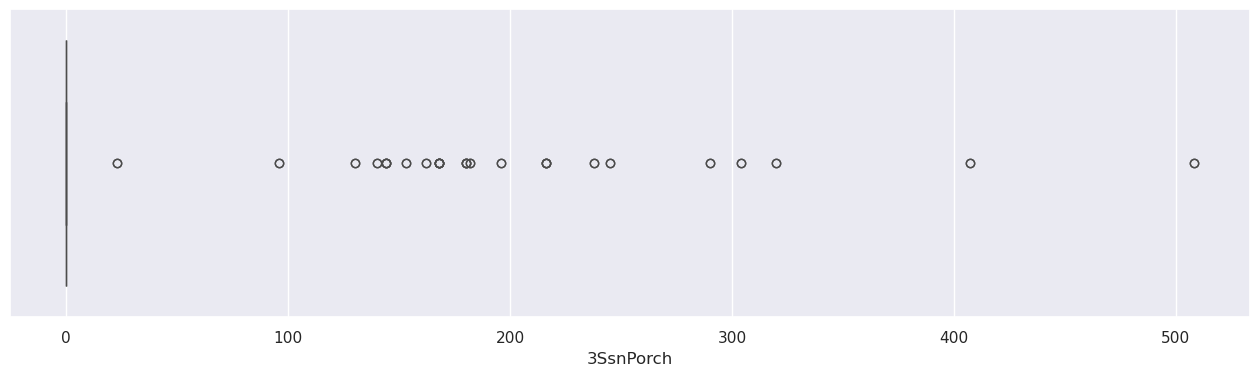

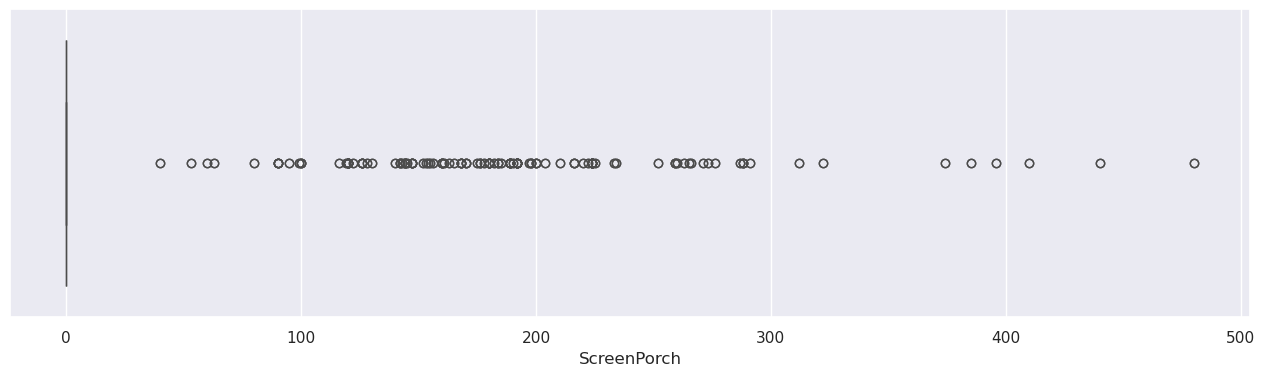

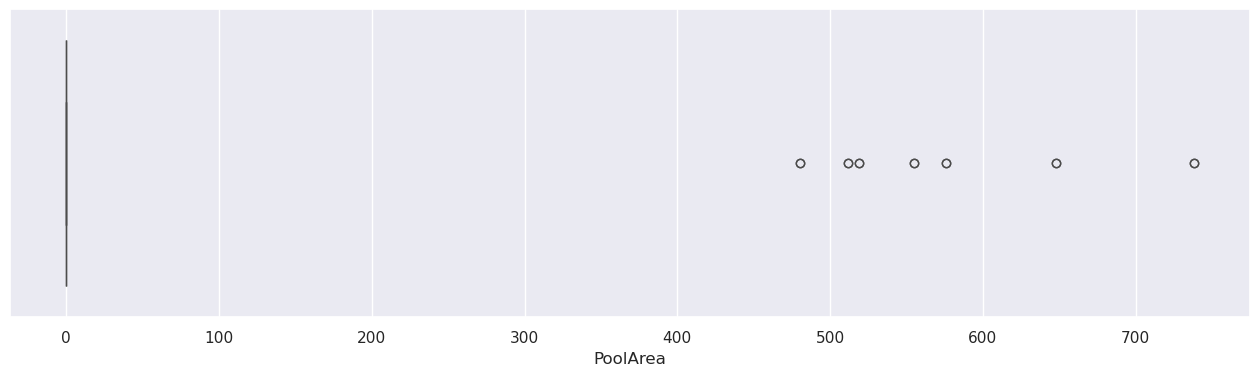

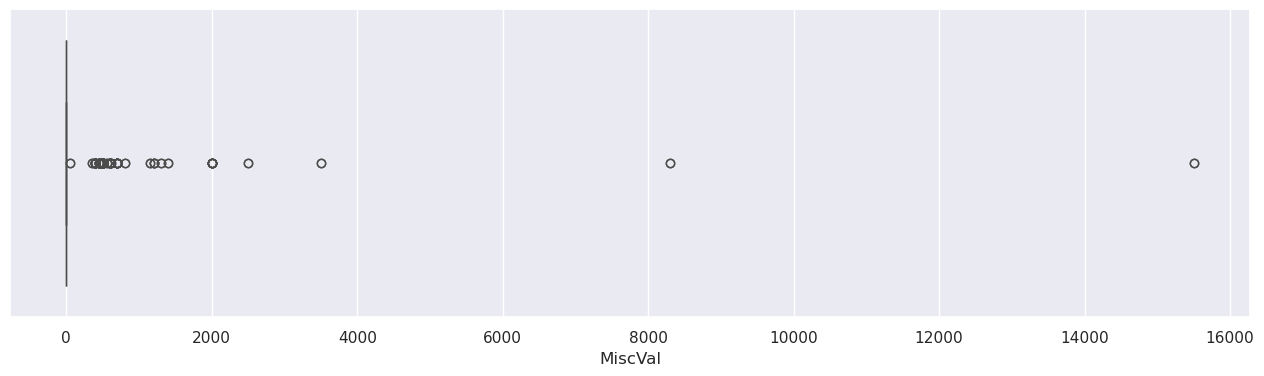

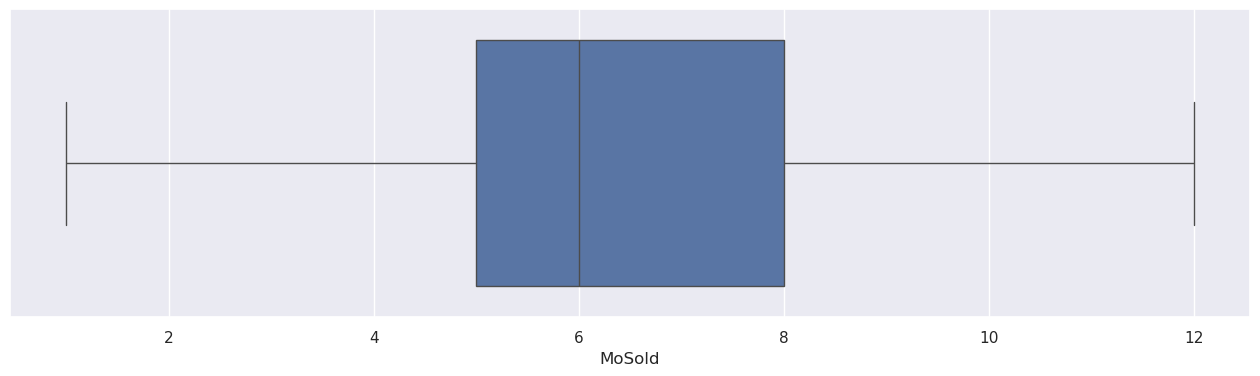

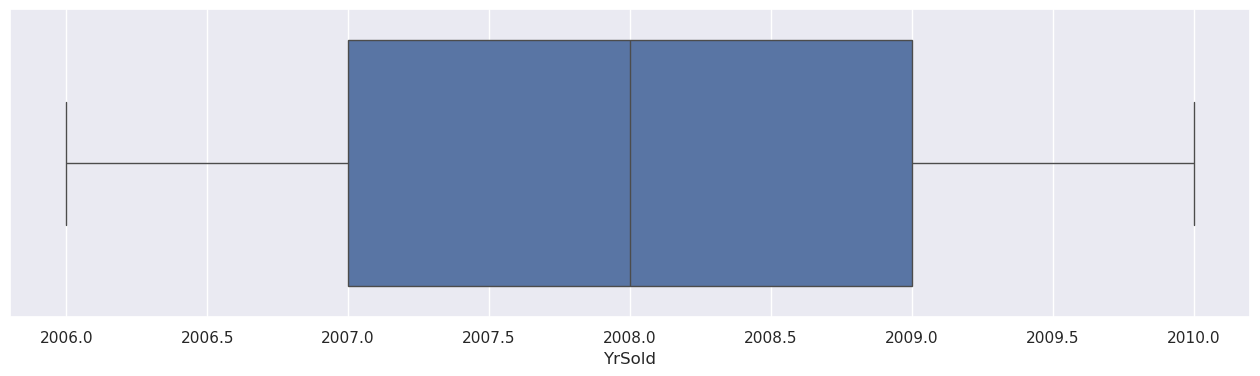

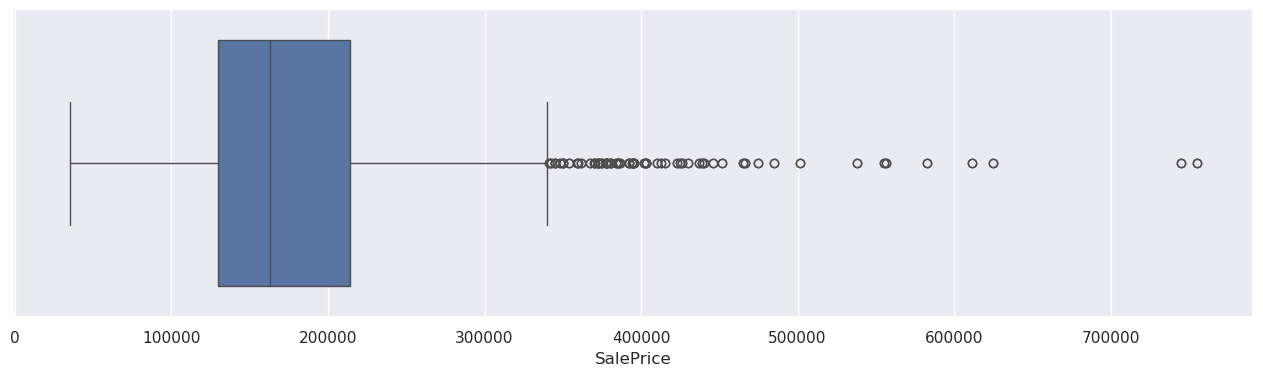

In [25]:
# coloca os gráficos do dataset.
numeral_df = all_df.select_dtypes(exclude=['object'])
numeral_df = numeral_df.drop(['Id'], axis=1)
for coluna in numeral_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style='darkgrid')
    sns.boxplot(numeral_df[coluna], orient='h')
                            

In [ ]:
Imputar características categóricas ausentes

In [31]:
recurso_Qual = [col for col in all_df.columns if 'Qual' in col and all_df[col].dtypes=='object']
recurso_Cond = [col for col in all_df.columns if 'Cond' in col and col not in ['Condition1', 'Condition2', 'SaleCondition'] and all_df[col].dtypes=='object']
recurso_Qu = [col for col in all_df.columns if 'Qu' in col and all_df[col].dtypes=='object' and col not in recurso_Qual]
recurso_QC = [col for col in all_df.columns if 'QC' in col and all_df[col].dtypes=='object']

recurso = recurso_Qual + recurso_Cond + recurso_Qu + recurso_QC

for x in recurso:
    print(x)

ExterQual
BsmtQual
KitchenQual
GarageQual
ExterCond
BsmtCond
GarageCond
FireplaceQu
HeatingQC
PoolQC


## **Analise dos dados faltantes**

Ao lidar com um dataset real, como o conjunto de dados do projeto "House Prices - Advanced Regression Techniques", é comum encontrar colunas que contenham valores faltantes (ou nulos). Esses dados ausentes podem ocorrer por diversos motivos, como a falta de informações durante a coleta de dados, campos que não se aplicam a certas observações ou erros no processo de entrada de dados.

No contexto da análise preditiva e da construção de modelos de machine learning, é importante entender onde estão esses valores faltantes e qual a sua proporção. A presença de muitos dados ausentes pode afetar o desempenho do modelo e a qualidade das previsões, especialmente se os dados perdidos forem sistemáticos ou afetarem variáveis importantes.

No dataset utilizado para prever o preço de venda das casas, calculei a porcentagem de valores faltantes em cada coluna para identificar as variáveis mais afetadas. O cálculo foi feito da seguinte forma:

In [11]:
all_df.isnull().sum().sort_values(ascending=False)

PoolQC         2906
MiscFeature    2812
Alley          2738
Fence          2358
MasVnrType     1744
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [43]:
print(f'Porcentagem dos dados faltantes: {(all_df.isnull().mean() * 100).sort_values(ascending=False).head(30)}')

Porcentagem dos dados faltantes: PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64


A tabela resultante mostra quais colunas apresentam valores ausentes e a porcentagem desses dados em relação ao total de observações. Esta análise nos ajuda a decidir quais abordagens seguir para tratar esses dados, como remoção de colunas, imputação de valores ou simplesmente ignorar as variáveis, dependendo da quantidade e relevância.

## **Visualização dos dados faltantes**

Para facilitar a interpretação dos dados faltantes, é possível criar visualizações que nos ajudem a entender a magnitude e a distribuição dos valores ausentes. Gráficos de barras, por exemplo, são uma forma eficiente de visualizar a porcentagem de valores faltantes por coluna.

<AxesSubplot: >

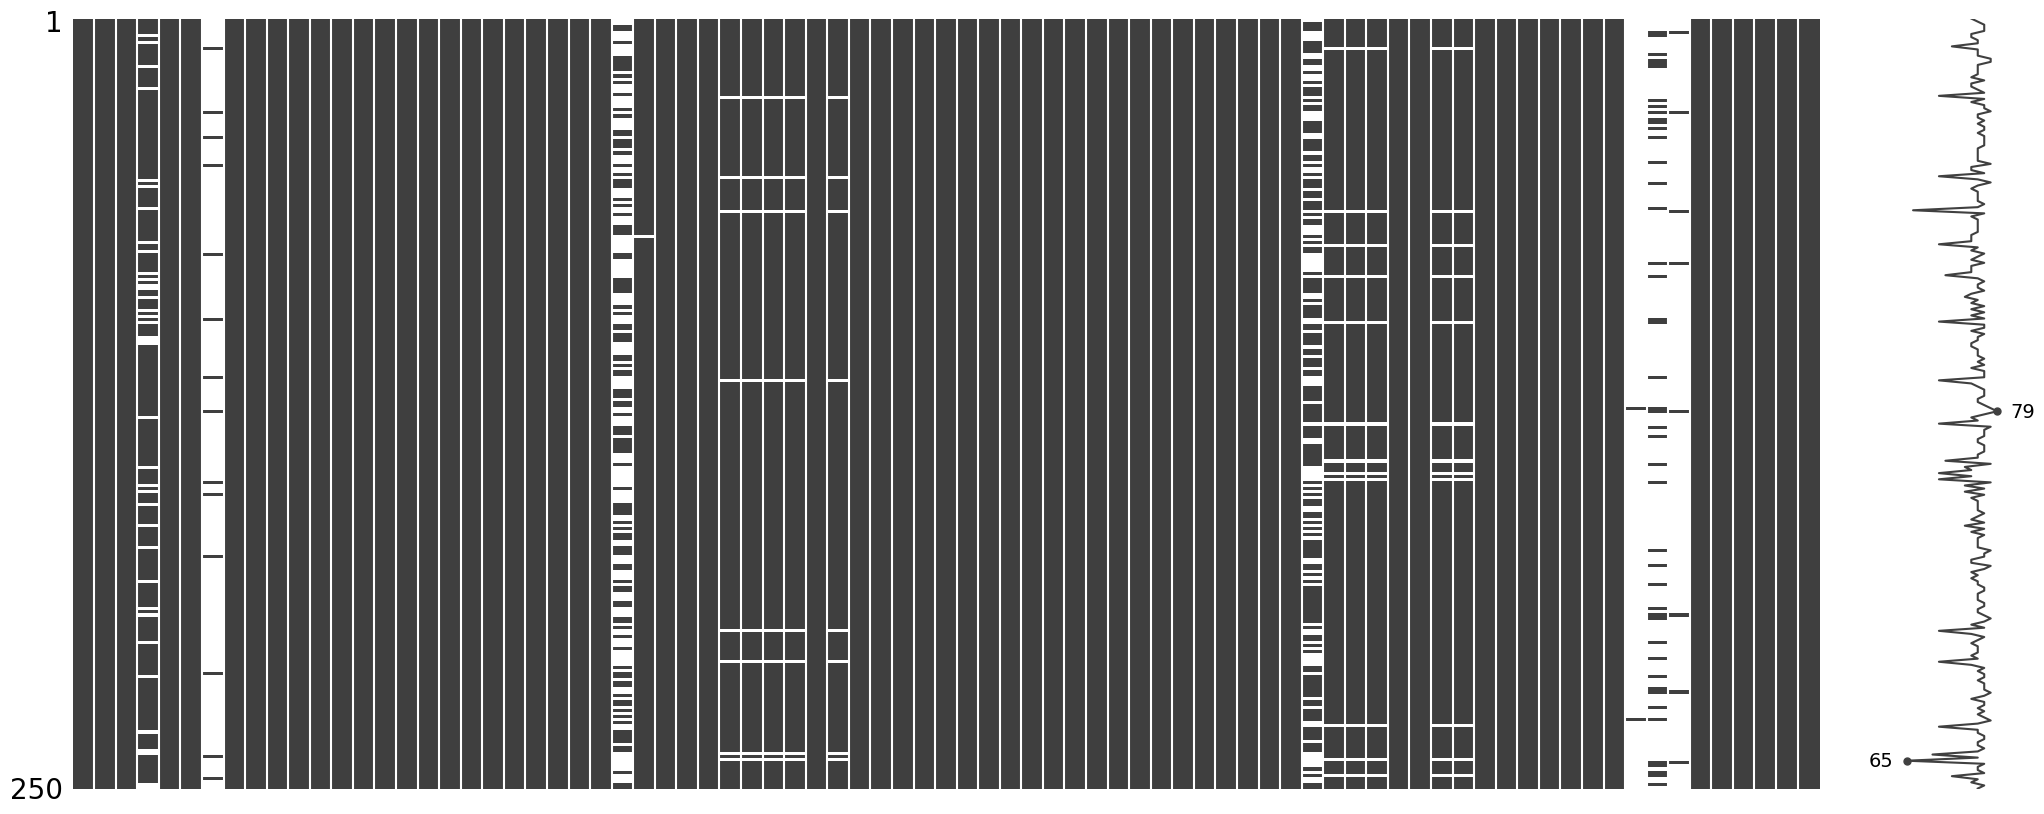

In [13]:
%matplotlib inline
msno.matrix(all_df.sample(250))

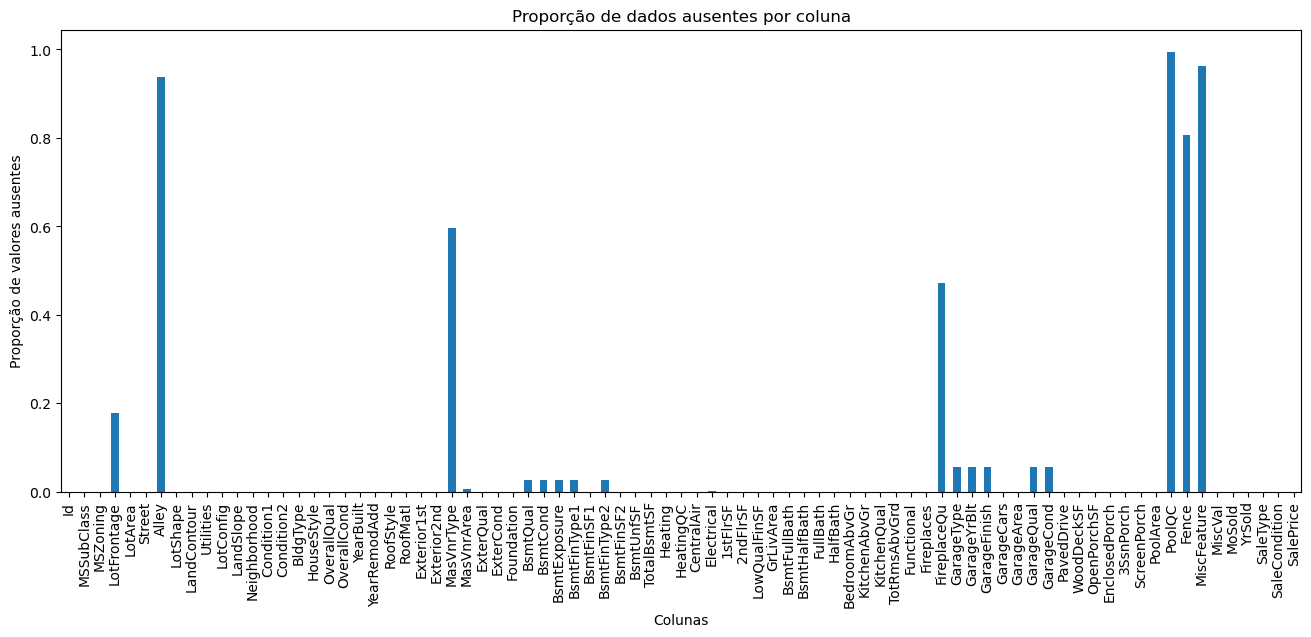

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
all_df.isnull().mean().abs().plot.bar(ax=ax)
ax.set_title('Proporção de dados ausentes por coluna')
ax.set_xlabel('Colunas')
ax.set_ylabel('Proporção de valores ausentes')
plt.show()

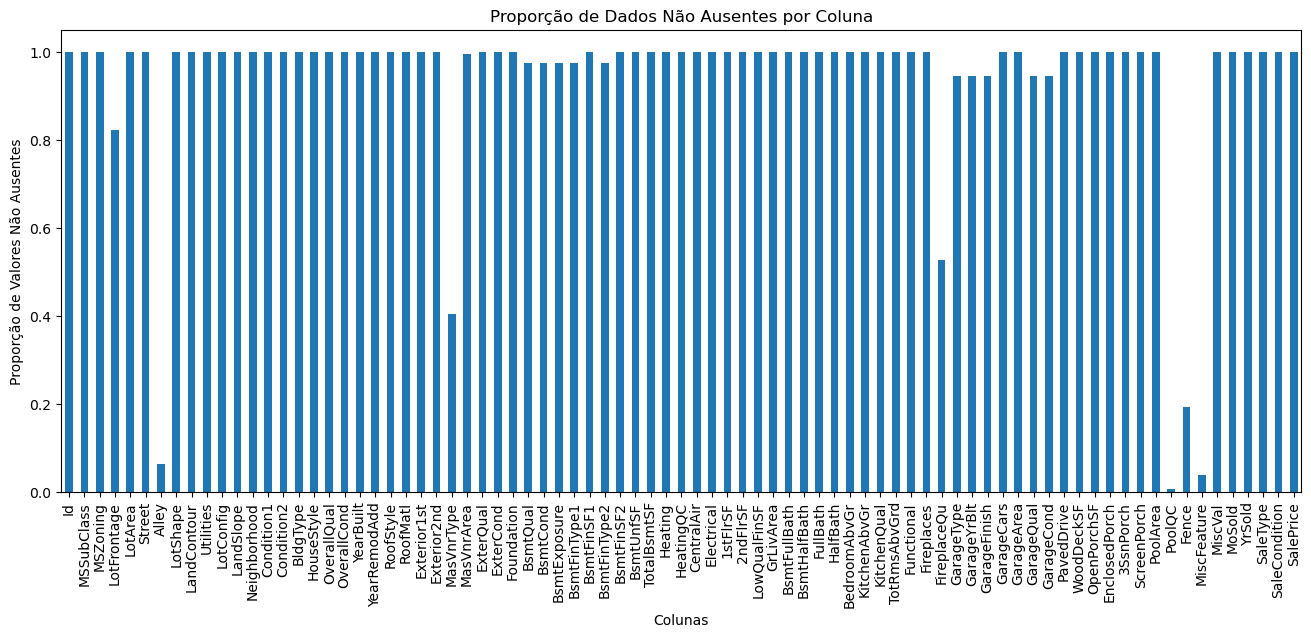

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

(1 - all_df.isnull().mean()).plot.bar(ax=ax)

ax.set_title('Proporção de Dados Não Ausentes por Coluna')
ax.set_xlabel('Colunas')
ax.set_ylabel('Proporção de Valores Não Ausentes')
plt.show()

<AxesSubplot: >

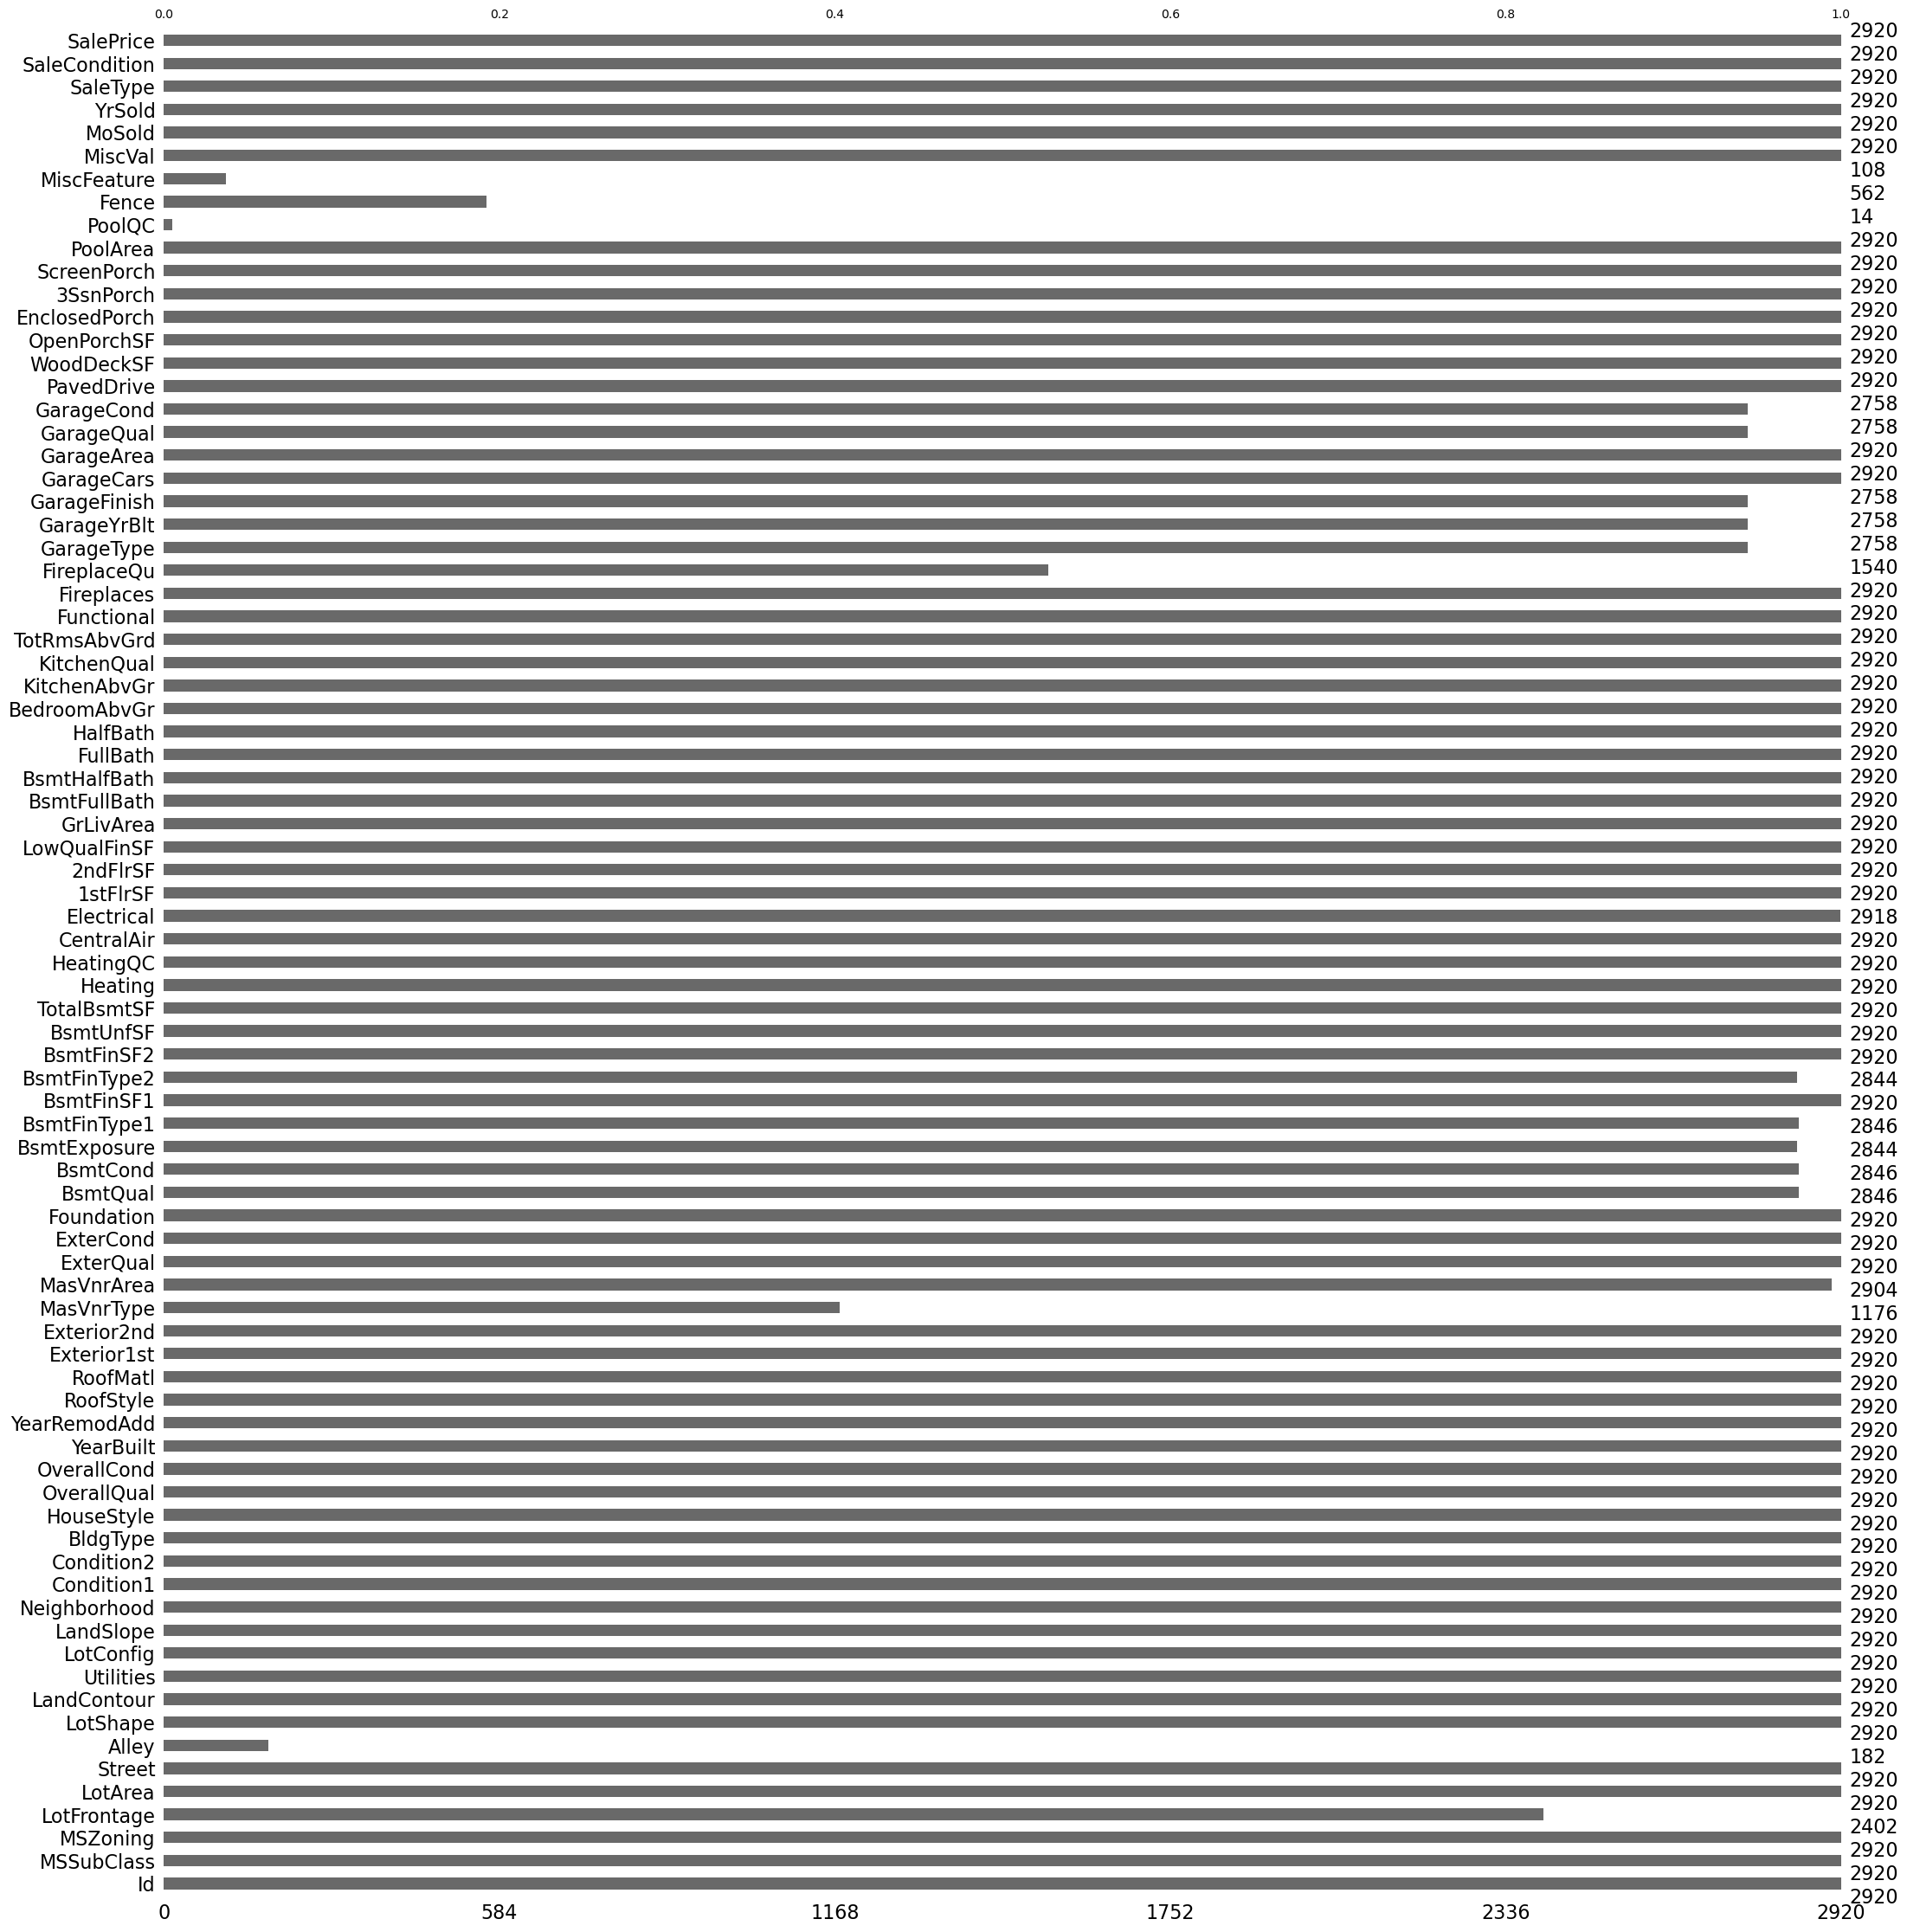

In [16]:
msno.bar(all_df.sample(all_df.shape[0]))

In [17]:
drop_colunas = []
for coluna, num in zip(all_df.isnull().sum().index, all_df.isnull().sum().values):
    if num > all_df.shape[0] // 2:
        drop_colunas.append(coluna)

drop_colunas

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

As colunas que tiveram mais de 50% de dados ausentes, vai ser removida

In [18]:
all_df.drop(columns=drop_colunas, inplace=True)

all_df.shape

(2920, 76)

<AxesSubplot: >

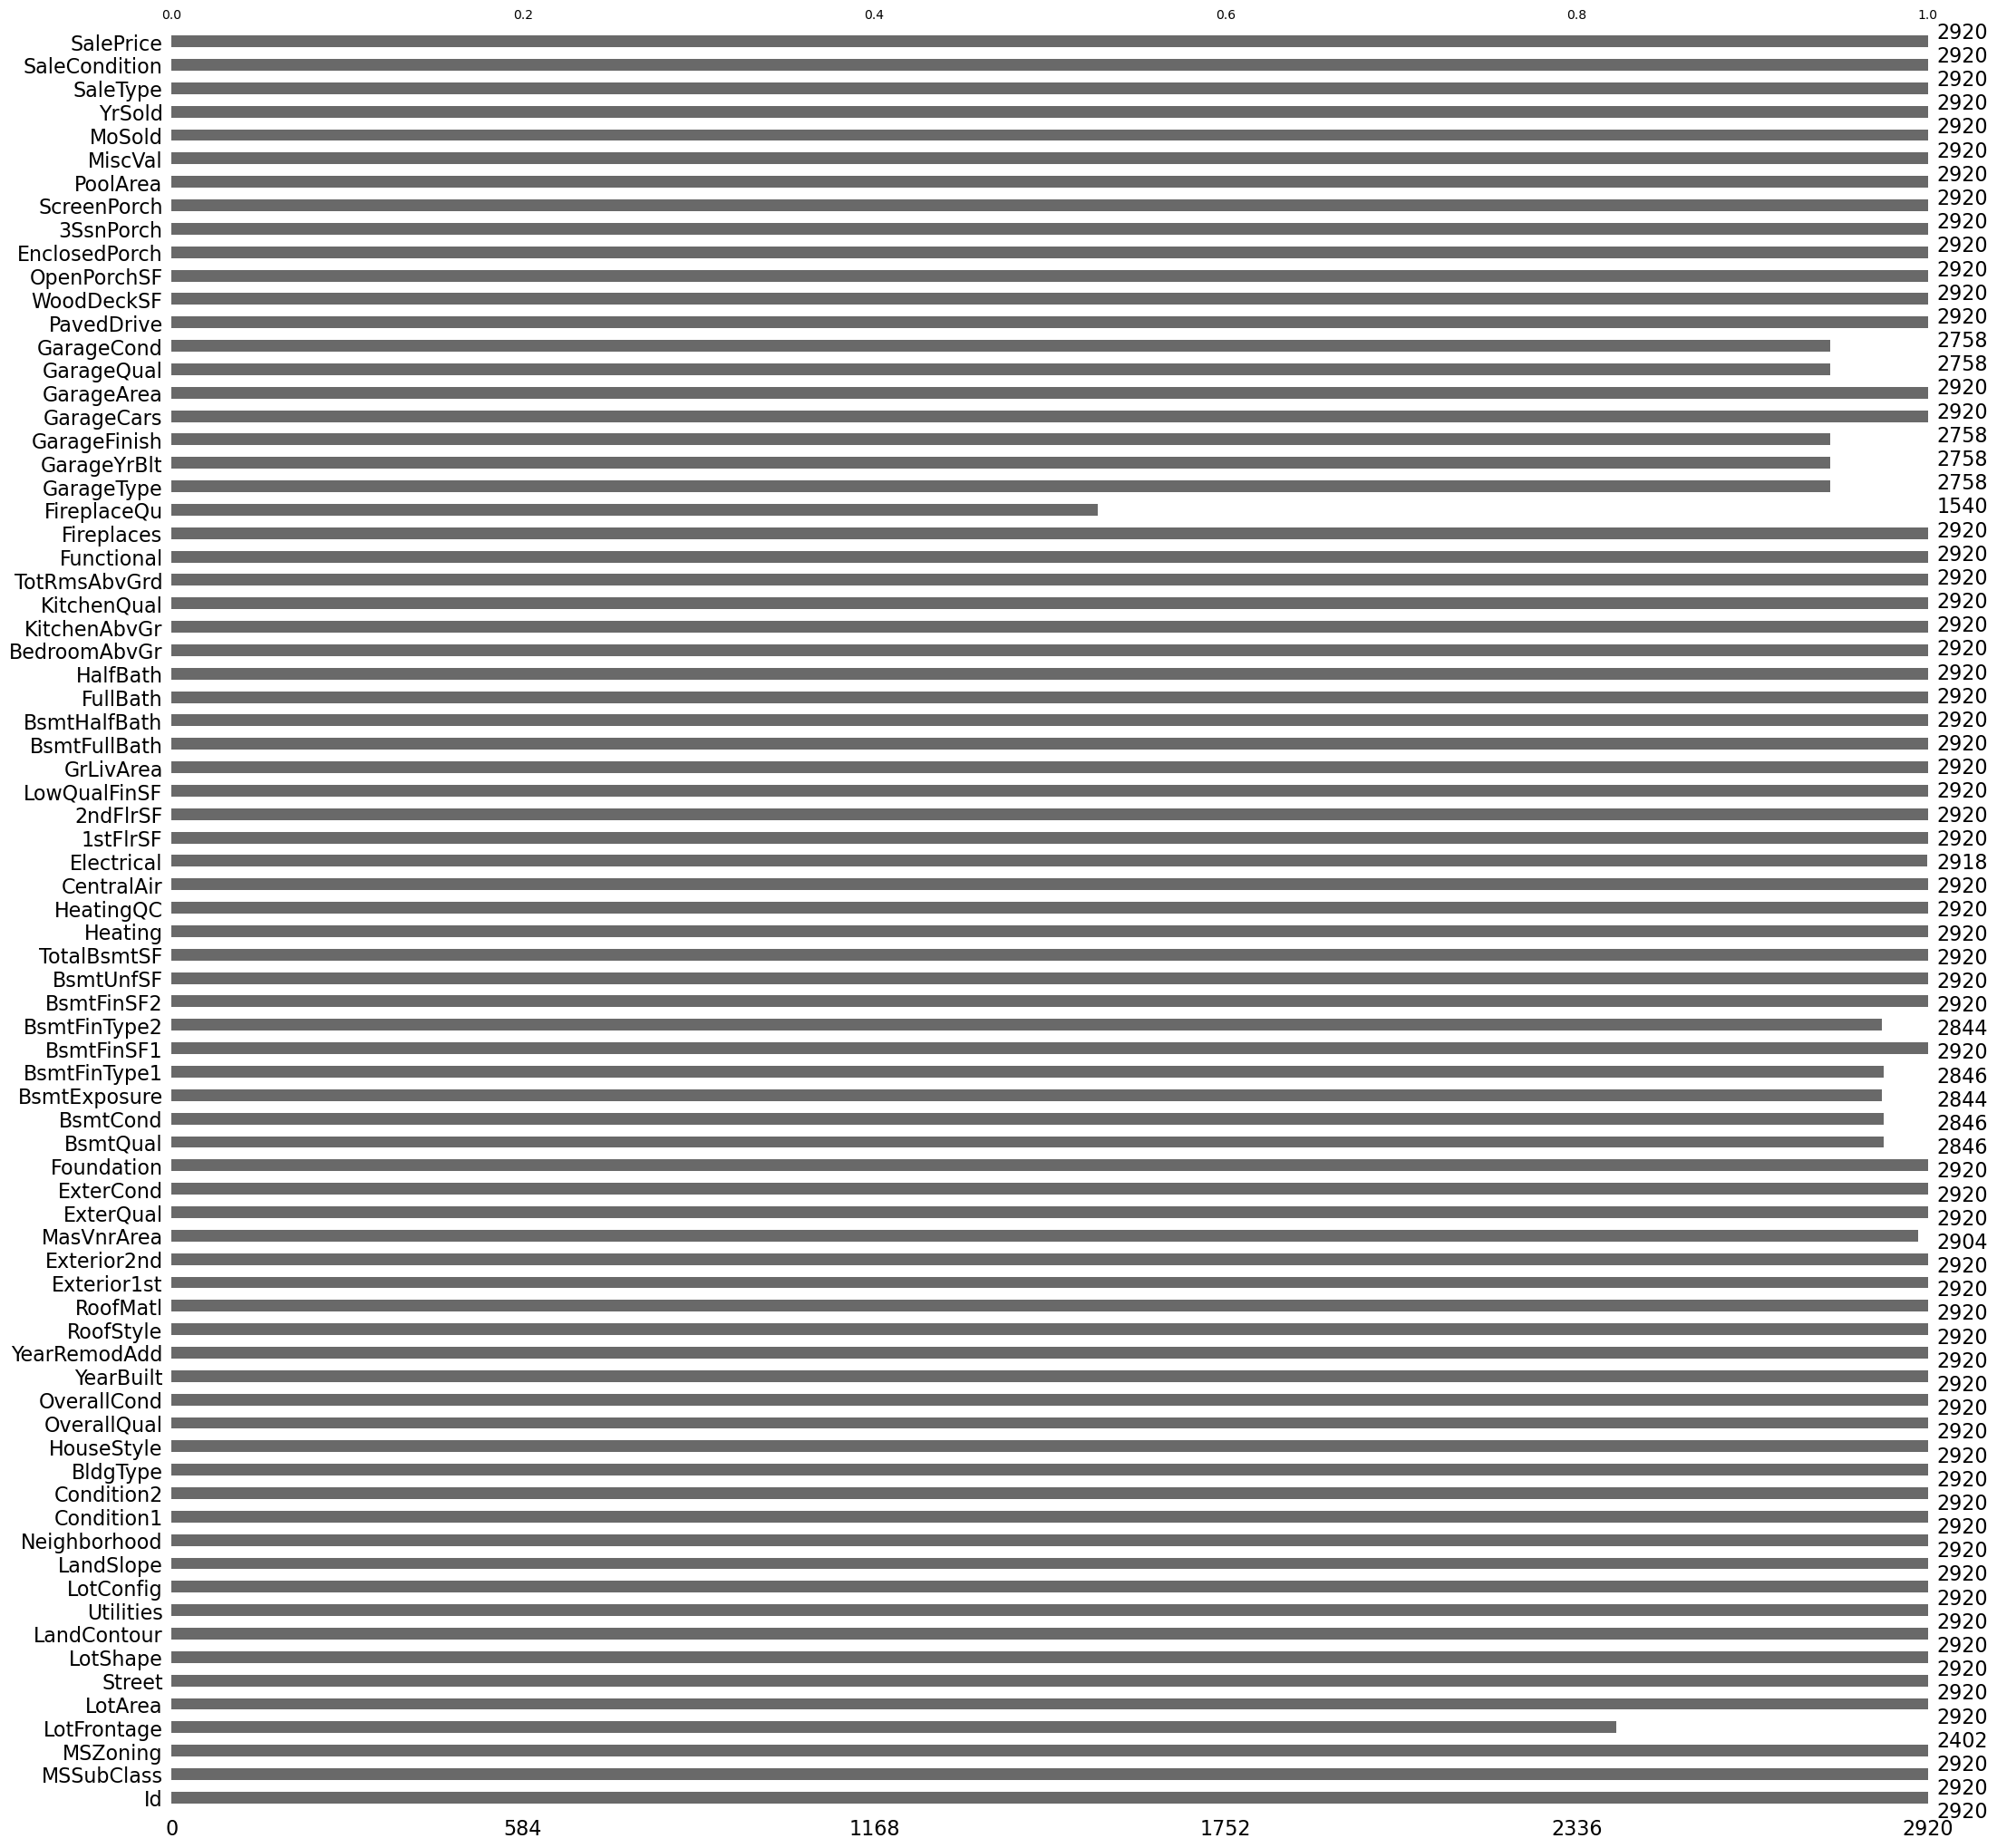

In [19]:
msno.bar(all_df.sample(all_df.shape[0]))

In [30]:
print(f'{all_df.FireplaceQu.isnull().sum()/all_df.shape[0] * 100} dos dados da colunas FireplaceQu')
print(f'{all_df.LotFrontage.isnull().sum()/all_df.shape[0] * 100} dos dados da colunas LotFrontage')

47.26027397260274 dos dados da colunas FireplaceQu
17.73972602739726 dos dados da colunas LotFrontage


## **Separar os dados numéricos dos objetos**

In [50]:
# categoricos
all_categoria_df = [col_nome for col_nome in all_df.columns if all_df[col_nome].dtypes=='object' and all_df[col_nome].nunique() < 10]

# numericos
all_numerico_df = [col_nome for col_nome in all_df.columns if all_df[col_nome].dtypes != 'object']